## MNIST Inpainting model creator

In [2]:
import numpy as np
import tensorflow as tf
import scipy 
from scipy import misc
import os
import shutil

import random 
import matplotlib.pyplot as plt

MAX_PATCH_NUM = 4
MIN_PATCH_SIZE = 3
MAX_PATCH_SIZE = 7

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


(55000, 28, 28)


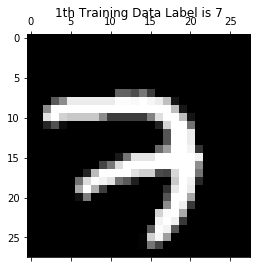

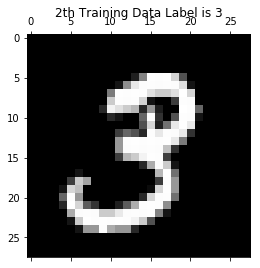

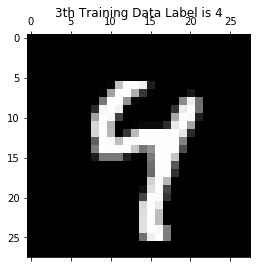

In [5]:
trainimg = mnist.train.images
train_X = trainimg.reshape([-1,28,28])
trainlabel = mnist.train.labels
nsample = 1
randidx = np.random.randint(trainimg.shape[0], size=nsample)

for i in [0, 1, 2]:
    curr_img   = np.reshape(trainimg[i, :], (28, 28)) # 28 by 28 matrix 
    curr_label = np.argmax(trainlabel[i, :] ) # Label
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    plt.title("" + str(i + 1) + "th Training Data " 
              + "Label is " + str(curr_label))
IMAGE_SIZE = train_X.shape
print(IMAGE_SIZE)

In [ ]:
num_img = train_X.shape[0]
W = train_X.shape[1]
H = train_X.shape[2]
imgs = np.zeros(train_X.shape)

print(imgs.shape)

for i in range(num_img):
    img = train_X[i].copy()
    num_patch = random.randint(2,MAX_PATCH_NUM)
    patch_size = random.randint(MIN_PATCH_SIZE, MAX_PATCH_SIZE)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    for n in range(num_patch):
        p = np.ones([patch_size, patch_size])
        locx = random.randint(0, W - patch_size)
        locy = random.randint(0, H - patch_size)
        img[locx:locx+patch_size, locy:locy+patch_size] = p

    '''add information loss to justify good pathces'''
    ##TODO
    
    imgs[i] = img


np.savez('./mnist_inpainting_train', x = imgs, y = train_X)
print("saveing done")

(55000, 28, 28)
saveing done


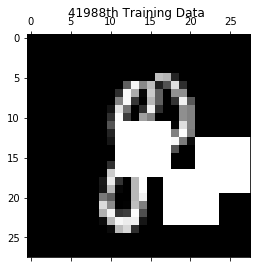

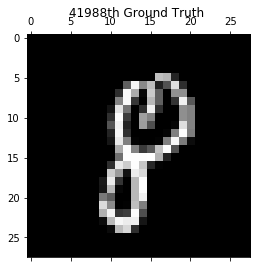

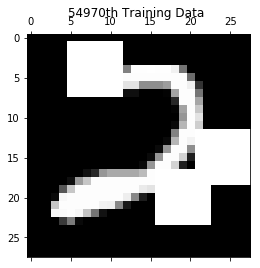

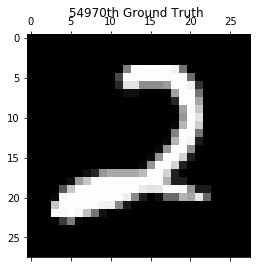

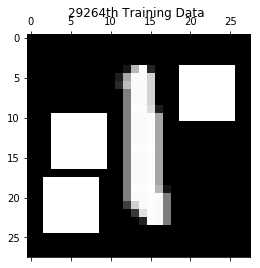

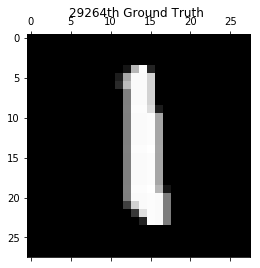

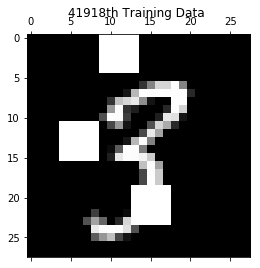

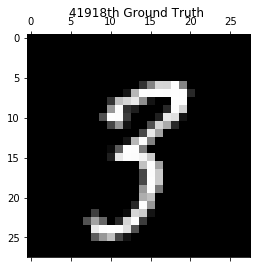

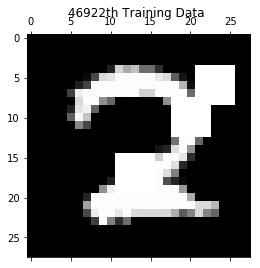

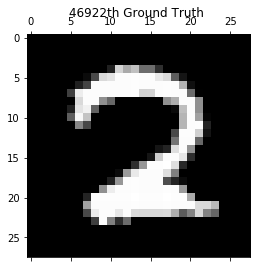

In [6]:
data = np.load("./mnist_inpainting_train.npz")

for i in range(5):
    ind = random.randint(1,55000)
    img_x = data['x'][ind]
    img_y = data['y'][ind]
    plt.matshow(img_x, cmap = plt.get_cmap('gray'))
    plt.title("" + str(ind) + "th Training Data ")
    plt.matshow(img_y, cmap = plt.get_cmap('gray'))
    plt.title("" + str(ind) + "th Ground Truth ")
    
